<a href="https://colab.research.google.com/github/provbs/predict_lottery_ai/blob/main/%EB%A1%9C%EB%98%90%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pathlib

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import numpy as np
import pandas as pd


# 1. 데이터 준비

In [ ]:
def ReadCSVandSavetoDF(filename): 
    
    df = pd.read_csv(filename)
    df = pd.DataFrame(df)
    return df

In [ ]:
cd drive/MyDrive/

/content/drive/MyDrive


In [ ]:
lotto_data_list = ReadCSVandSavetoDF("lotto_data.csv")
lotto_data_list = lotto_data_list.values.tolist()
#display(lotto_data_list)
type(lotto_data_list[1][1])

int

# ▶ 원핫인코딩(하나의 리스트에 넣어주기)




In [ ]:
# 전체 원핫인코딩 해주기

def number_onehotencoder(num_list):
  num_list.sort()
  list = []
  counter = 1
  k = 0
  for z in range(0,45):
    if k <7 and counter == num_list[k]:
      list.append(1)
      counter += 1
      k += 1
    else:
      list.append(0)
      counter += 1
    
  return list

onehotencoded_data = []

for i in range(len(lotto_data_list)):
    encoded_list = number_onehotencoder(lotto_data_list[i])
    onehotencoded_data.append(encoded_list)

print(onehotencoded_data[0])
print(lotto_data_list[0])
print(onehotencoded_data[1])
print(lotto_data_list[1])

[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[2, 9, 13, 21, 25, 32, 42]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[11, 16, 19, 21, 27, 30, 31]


# ▶ X 와 Y 데이터 모아주기 (X를 10개의 리스트 세트당 Y 1개의 결과값 리스트 형식 등)

In [ ]:
X = []
Y = []


#X= pd.DataFrame(X)
#Y = pd.DataFrame(Y)
#X_train = pd.DataFrame(X_train)
#Y_train = pd.DataFrame(Y_train)
#X_test = pd.DataFrame(X_test)
#Y_test = pd.DataFrame(Y_test)

for q in range(0,200):
  setNum = 0
  new_array = []
  for i in range(len(onehotencoded_data)):
    if setNum != 10 :
      new_array.append(onehotencoded_data[i])
      setNum += 1
    elif setNum == 10 :
      X.append(new_array)
      new_array = []
      Y.append(onehotencoded_data[i])
      setNum = 0
  onehotencoded_data = onehotencoded_data[1:]
  #display(len(Y), len(X))

#X = pd.DataFrame(X)
#X.columns = ['Day1','Day2','Day3','Day4','Day5','Day6','Day7','Day8','Day9','Day10']

#X = X.reset_index()
#Y = Y.reset_index()
#X = X.astype(int)
#Y = Y.astype(int)
#X.drop('index', inplace=True, axis=1)
#Y.drop('index', inplace=True, axis=1)

#X = np.array(X)

print(X[1])

display(np.shape(X), np.shape(Y))

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0], [1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 

(16773, 10, 45)

(16773, 45)

# ▶ 원핫인코딩 (카테고리화 시키기) - 모든 숫자를 클래스화 시키기

In [ ]:
# def onehotencoder(num_list):
#    num_list.sort()
#    list = []
#    counter = 1
#    k = 0
#    for z in range(0,45):
#      if k <7 and counter == num_list[k]:
#       list.append(1)
#       counter += 1
#       k += 1
#      else:
#        list.append(0)
#        counter += 1
#    return list

# column_names = ["1", "2", "3", "4", "5", "6", "7", "8", "9",
#                 "10", "11", "12", "13", "14", "15", "16", "17","18", "19",
#                 "20", "21", "22", "23", "24", "25", "26", "27", "28", "29",
#                 "30", "31", "32", "33", "34", "35", "36", "37", "38", "39",
#                 "40", "41", "42", "43", "44", "45"]
# Y_onehotencoded = pd.DataFrame(columns = column_names)

# for i in range(len(Y)):
#   for j in range(len(Y[i])):
#       encoded_list = onehotencoder(Y[i][j])
#       encoded_list = pd.DataFrame(encoded_list).T
#       encoded_list.columns = column_names
#       Y_onehotencoded = Y_onehotencoded.append(encoded_list)

# Y_onehotencoded = Y_onehotencoded.reset_index()
# Y_onehotencoded.drop('index', inplace=True, axis=1)

# #Y_onehotencoded = np.asarray(Y_onehotencoded)

# #Y_onehotencoded = Y_onehotencoded.values.tolist()

# display(Y_onehotencoded.head())

# ▶ 원핫인코딩 to_categorical


In [ ]:
# from tensorflow.keras.utils import to_categorical
# Y_onehotencoded = to_categorical(Y, num_classes=46)
# #X_onehotencoded = to_categorical(X, num_classes=46)

# #Y_onehotencoded = Y_onehotencoded.tolist()
# display(np.shape(Y_onehotencoded))
# #display(np.shape(X_onehotencoded))
# print(Y_onehotencoded[0])

# print(X[1])

# ▶ 데이터를 Train 과 Test로 분할하기

In [ ]:
#X = pd.DataFrame(X.tolist())

train_number = int(len(X)*0.9)

X_train = X[:train_number]
Y_train = Y[:train_number]
X_test = X[train_number:]
Y_test = Y[train_number:]

#X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

display(np.shape(X_train), np.shape(Y_train))
display(np.shape(X_test), np.shape(Y_test))


(15095, 10, 45)

(15095, 45)

(1678, 10, 45)

(1678, 45)

In [ ]:
display(type(X_train))
display(type(Y_train))

list

list

# 2. 모델 설정

In [ ]:
## 머신러닝 모델 빌딩
from keras.layers import Dense, SimpleRNN, Embedding, BatchNormalization

def build_model():
    model = keras.Sequential([
    layers.SimpleRNN(32, activation='tanh', input_shape=(10,45), return_sequences=True),
    layers.SimpleRNN(16, activation='tanh'),
    layers.Dense(32, activation = "relu"),
    layers.Dense(45, activation = "sigmoid")
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['accuracy'])

    return model

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10, 32)            2496      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 16)                784       
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 45)                1485      
                                                                 
Total params: 5,309
Trainable params: 5,309
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 머신러닝 돌리기
EPOCHS = 70
early_stop = keras.callbacks.EarlyStopping(monitor='loss', patience=10)

history = model.fit(X_train, Y_train, epochs=EPOCHS, batch_size = 133, verbose = 1) 
#history = model.fit(X_train, Y_train, epochs=EPOCHS,validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])


Epoch 1/70
114/114 [==============================] - 6s 15ms/step - loss: 0.4540 - accuracy: 0.0091
Epoch 2/70
114/114 [==============================] - 2s 16ms/step - loss: 0.4321 - accuracy: 0.0265
Epoch 3/70
114/114 [==============================] - 2s 16ms/step - loss: 0.4305 - accuracy: 0.0088
Epoch 4/70
114/114 [==============================] - 2s 16ms/step - loss: 0.4264 - accuracy: 0.0132
Epoch 5/70
114/114 [==============================] - 2s 15ms/step - loss: 0.4185 - accuracy: 0.0158
Epoch 6/70
114/114 [==============================] - 2s 15ms/step - loss: 0.4089 - accuracy: 0.0199
Epoch 7/70
114/114 [==============================] - 2s 15ms/step - loss: 0.3975 - accuracy: 0.0220
Epoch 8/70
114/114 [==============================] - 2s 15ms/step - loss: 0.3850 - accuracy: 0.0248
Epoch 9/70
114/114 [==============================] - 2s 15ms/step - loss: 0.3728 - accuracy: 0.0307
Epoch 10/70
114/114 [==============================] - 2s 15ms/step - loss: 0.3617 - accura

# 3. 결과 분석

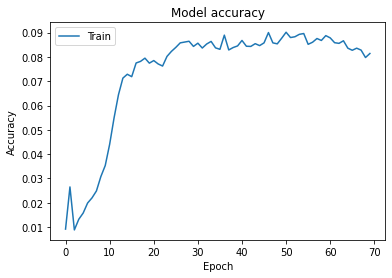

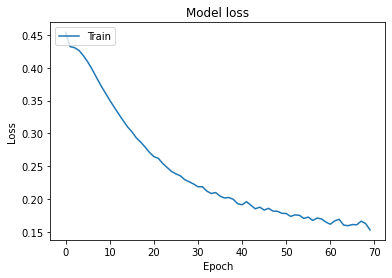

In [ ]:
# 플로팅으로 결과값 확인

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
print(X_test[3])
pred = model.predict(X_test)
#print(Y_test[3])
#print(pred[3])
#print(pred[4])

#display(pred[3],pred[4],pred[11])

#display(pred)


[[0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0], [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 

In [ ]:
import copy

def findBiggestInList(list_input, numbers):
  answer = []
  for i in range(0, numbers):
    max_value = max(list_input)
    index = np.where(list_input == max_value)
    answer.append(index[0][0]+1)
    list_input[int(index[0][0])] = -1
  return answer

def findBiggestInListv2(list, numbers):
  answer = []
  for i in range(0, 45):
    if list[i] == 1:
      answer.append(i)
  return answer



In [ ]:
# 몇개나 맞췄는지 알아보자!
total_percentage = 0

for p in range(len(Y_test)) :
  ##change num here
  testing_sample_num = p

  pred_copy = copy.deepcopy(pred[testing_sample_num])
  #print(pred_copy)
  Y_test_copy = copy.deepcopy(Y_test)

  prediction = findBiggestInList(pred_copy,7)
  prediction.sort()
  #prediction = pred[testing_sample_num]
  answer_y = Y_test_copy[testing_sample_num]
  answer_y = findBiggestInListv2(answer_y,7)
  #answer_y.sort()

  print("Prediction : ")
  print(prediction)
  # print("Answer : ")
  # print(answer_y)

  correct_guess_number = 0

  for i in range(0,7) :
    for z in answer_y :
      if prediction[i] == z : correct_guess_number += 1

  #print("correct number : ", correct_guess_number)

  percentage = correct_guess_number / 7 * 100
  #print(percentage)
  total_percentage += percentage
  #print(total_percentage)


total_percentage /= len(Y_test)
print("Accuracy : " , total_percentage, "%")



Prediction : 
[2, 11, 13, 14, 16, 24, 37]
Prediction : 
[6, 10, 16, 18, 20, 25, 40]
Prediction : 
[2, 6, 10, 13, 29, 40, 41]
Prediction : 
[5, 11, 13, 18, 22, 31, 34]
Prediction : 
[1, 3, 14, 15, 24, 35, 40]
Prediction : 
[5, 11, 16, 22, 28, 35, 36]
Prediction : 
[27, 32, 36, 37, 41, 43, 45]
Prediction : 
[12, 20, 24, 26, 33, 44, 45]
Prediction : 
[1, 4, 29, 34, 39, 43, 45]
Prediction : 
[9, 11, 14, 18, 27, 29, 36]
Prediction : 
[7, 12, 20, 24, 25, 29, 33]
Prediction : 
[14, 15, 18, 23, 31, 34, 44]
Prediction : 
[3, 5, 11, 12, 26, 38, 44]
Prediction : 
[8, 11, 12, 18, 31, 38, 39]
Prediction : 
[1, 3, 18, 20, 26, 27, 38]
Prediction : 
[4, 7, 13, 22, 26, 37, 42]
Prediction : 
[5, 11, 26, 27, 31, 32, 38]
Prediction : 
[4, 11, 14, 23, 32, 41, 43]
Prediction : 
[1, 3, 7, 8, 9, 34, 36]
Prediction : 
[11, 13, 18, 23, 37, 39, 43]
Prediction : 
[3, 10, 14, 33, 36, 37, 38]
Prediction : 
[7, 9, 10, 12, 26, 38, 39]
Prediction : 
[4, 5, 10, 12, 24, 27, 28]
Prediction : 
[1, 18, 20, 29, 32, 38, 43]


In [ ]:



# pred = model.predict()

# 4. 결과 저장

In [ ]:
# 모델 acuuracy 적고 저장
# model.save("my_model_1")

In [ ]:
# 모델 저장된거 가져오기
# reconstructed_model = keras.models.load_model("my_model_68.5")

In [ ]:
# 원하는 데이터를 넣어 내일 값을 예측해보자


# df_cols = ['PriceIncrement', 'StartPriceIncrement', 'IncrementCmp7days', 'VolumeIncrement', 'HighLowDiff']
# new_row =[-0.15,-0.31,-1.95,106.60,0.61]
# new_df = pd.DataFrame(columns = df_cols)
# new_df.loc[0] = new_row

# test_predictions = model.predict(new_df).flatten()
# display(test_predictions)